### visualize the major rivers in hma

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.feature as cfeature

In [ ]:
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_hma_rivers = 'data/water-extent/rivers/hma_major_rivers.gpkg'
path_hma_rivers_reaches = 'data/water-extent/rivers/hma_rivers_reaches_sword_v16.gpkg'

In [10]:
### read in data
hma_gtng = gpd.read_file(path_hma_gtng)
hma_rivers = gpd.read_file(path_hma_rivers)
hma_rivers_reaches = gpd.read_file(path_hma_rivers_reaches)
hma_rivers.head()


,NAME,SYSTEM,MILES,KILOMETERS,geometry
0,Indus,None,2015.16218,3243.09564,"MULTILINESTRING ((67.48645 24.04542, 67.65091 ..."
1,Ganges,None,1481.59615,2384.40264,"MULTILINESTRING ((79.87328 30.95868, 79.81163 ..."
2,Yarlung Zangbo,None,1897.09807,3053.08950,"MULTILINESTRING ((82.00998 30.48415, 82.24191 ..."
3,Mekong,None,2942.45095,4735.42525,"MULTILINESTRING ((93.88553 33.26776, 93.88915 ..."
4,Irrawaddy,None,1297.67231,2088.40532,"MULTILINESTRING ((94.98852 16.23617, 95.12437 ..."


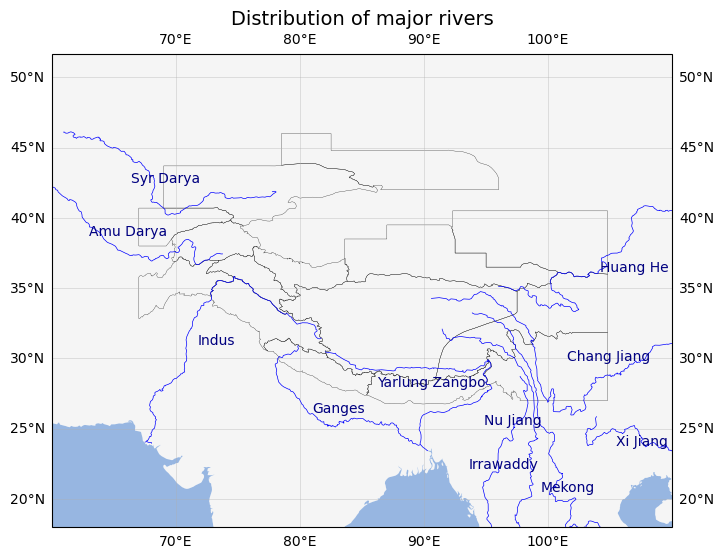

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([60.0, 110.0, 18.0, 49.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.2)
hma_rivers.plot(ax=ax, edgecolor='Blue', linewidth=0.5)
for idx, row in hma_rivers.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row['NAME'], fontsize=10, color='navy', 
            ha='center', va='center', transform=ccrs.PlateCarree())

## add auxiliary features
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.set_title('Distribution of major rivers', fontsize=14)
# plt.savefig('figures/water-extent/hma_major_rivers.png', bbox_inches='tight', dpi=100)


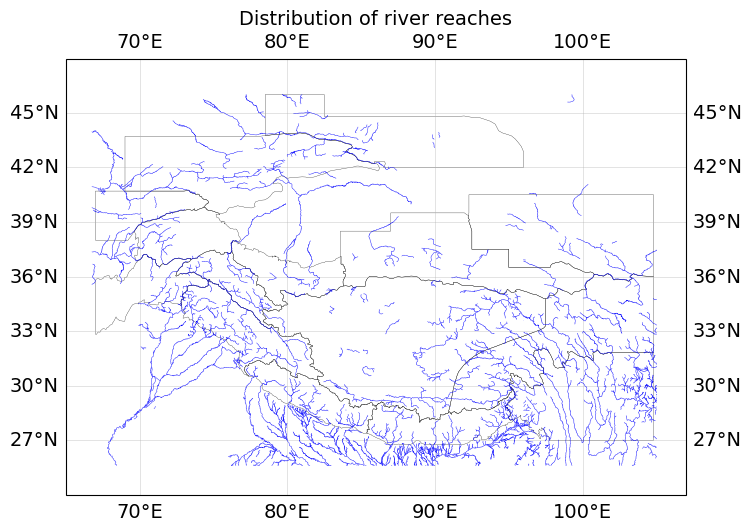

In [38]:
## rivers (river reaches)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.2)
hma_rivers_reaches.plot(ax=ax, edgecolor='Blue', linewidth=0.3)
ax.set_title('Distribution of river reaches', fontsize=14)
plt.savefig('figures/water-extent/hma_river_reaches_sword.png', bbox_inches='tight', dpi=100)
